In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:

df = pd.read_csv("cleaned_data.csv")

In [70]:

df.head()

,role,seniority,avg_salary,state,company_rating,company_size,sector,company_age,city
0,data scientist,2,72.0,NM,3.8,medium,Aerospace & Defense,47,other
1,data scientist,2,87.5,MD,3.4,large,Health Care,36,other
2,data scientist,2,85.0,FL,4.8,medium,Business Services,10,other
3,data scientist,2,76.5,WA,3.8,large,"Oil, Gas, Energy & Utilities",55,Richland
4,data scientist,2,114.5,NY,2.9,small,Business Services,22,New York


(array([  6., 108., 184., 182., 121.,  85.,  39.,   9.,   3.,   5.]),
 array([ 15.5 ,  39.35,  63.2 ,  87.05, 110.9 , 134.75, 158.6 , 182.45,
        206.3 , 230.15, 254.  ]),
 <a list of 10 Patch objects>)

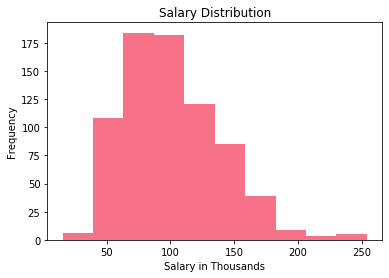

In [71]:
plt.xlabel('Salary in Thousands')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.hist(df['avg_salary'])

(array([ 11.,   0.,   0.,   0.,   3.,  18.,  93., 274., 248.,  95.]),
 array([-1. , -0.4,  0.2,  0.8,  1.4,  2. ,  2.6,  3.2,  3.8,  4.4,  5. ]),
 <a list of 10 Patch objects>)

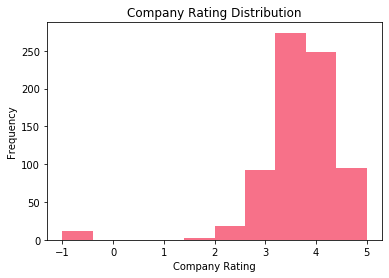

In [72]:
plt.xlabel('Company Rating')
plt.ylabel('Frequency')
plt.title('Company Rating Distribution')
plt.hist(df['company_rating'])

(array([676.,  16.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.]),
 array([1.000e+00, 2.030e+02, 4.050e+02, 6.070e+02, 8.090e+02, 1.011e+03,
        1.213e+03, 1.415e+03, 1.617e+03, 1.819e+03, 2.021e+03]),
 <a list of 10 Patch objects>)

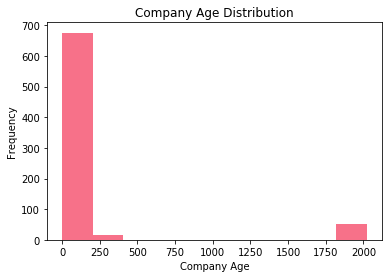

In [73]:
plt.xlabel('Company Age')
plt.ylabel('Frequency')
plt.title('Company Age Distribution')
plt.hist(df['company_age'])

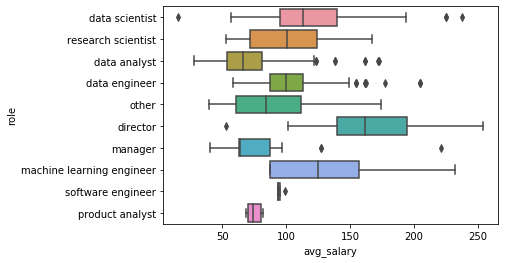

In [74]:
sns.boxplot(x = 'avg_salary', y='role', data = df)

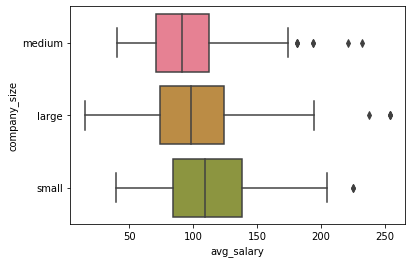

In [75]:
sns.boxplot(x = 'avg_salary', y='company_size', data = df)

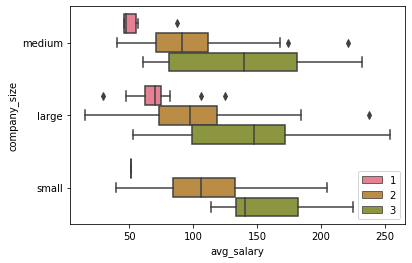

In [76]:

sns.boxplot(x = 'avg_salary', y='company_size', hue = 'seniority', data = df)
plt.legend(loc='lower right')

In [77]:
def map_company_size(value):
    if value == "small":
        return 1
    elif value == "large":
        return 2
    else:
        return 3
    
df['company_size'] = df['company_size'].apply(map_company_size)
df.head()

,role,seniority,avg_salary,state,company_rating,company_size,sector,company_age,city
0,data scientist,2,72.0,NM,3.8,3,Aerospace & Defense,47,other
1,data scientist,2,87.5,MD,3.4,2,Health Care,36,other
2,data scientist,2,85.0,FL,4.8,3,Business Services,10,other
3,data scientist,2,76.5,WA,3.8,2,"Oil, Gas, Energy & Utilities",55,Richland
4,data scientist,2,114.5,NY,2.9,1,Business Services,22,New York


[Text(0.5, 0, 'seniority'),
 Text(1.5, 0, 'avg_salary'),
 Text(2.5, 0, 'company_rating'),
 Text(3.5, 0, 'company_size'),
 Text(4.5, 0, 'company_age')]

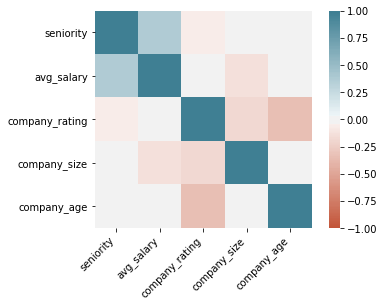

In [78]:
df_numeric = df[['seniority', 'avg_salary', 'company_rating', 'company_size', 'company_age']]
corr = df_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [79]:
corr

,seniority,avg_salary,company_rating,company_size,company_age
seniority,1.000000,0.370003,-0.060384,-0.005474,-0.018790
avg_salary,0.370003,1.000000,0.012475,-0.118856,0.009609
company_rating,-0.060384,0.012475,1.000000,-0.180165,-0.332927
company_size,-0.005474,-0.118856,-0.180165,1.000000,0.008073
company_age,-0.018790,0.009609,-0.332927,0.008073,1.000000


Larger companies and older companies seem to have lower company ratings (weak negative correlation). Seniority seems to have a moderate positive realtionship with salary as well which makes sense. Company rating seems to have a small positive correlation with salary as well, which would mean higher rated companies have a higher salary or vice versa. Rating also has a negative correlation with company size and age, so we can assume that older and larger companies have lower employee ratings.

In [80]:
#salary_by_role = pd.pivot_table(df, index = 'role', values = 'avg_salary')
#salary_by_role

sns.set_palette("husl", 8)

salary_by_role = df.groupby(['role'])['avg_salary'].mean()

Text(0.5, 1.0, 'Salary by Role')

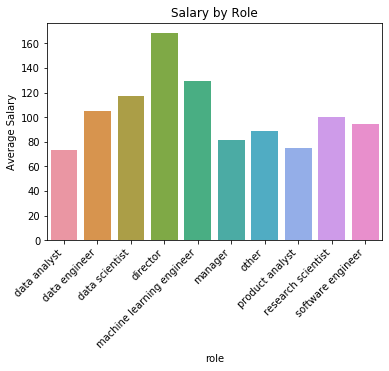

In [81]:
ax = sns.barplot(x = salary_by_role.index, y = salary_by_role.values)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylabel('Average Salary')
ax.set_title('Salary by Role')

In [82]:
# Regions are based on the US census regions

# break the states into regions and group by role and region to see how the salary differs
northeast = ['ME', 'NY', 'PA', 'VT', 'NH', 'CT', 'MA', 'RI', 'NJ']
# check DC
south = ['MD', 'DE', 'VA', 'WV', 'NC', 'KY', 'SC', 'TN', 'GA', 'AL', 'MS', 'FL', 'AR', 'LA', 'OK', 'TX', 'DC']
midwest = ['ND', 'SD', 'NE', 'KS', 'MO', 'IA', 'MN', 'WI', 'IL', 'IN', 'OH', 'MI']
west = ['WA', 'ID', 'MT', 'WY', 'CO', 'UT', 'NM', 'AZ', 'NV', 'CA', 'OR', 'Los Angeles']

len(south) + len(northeast) +len(midwest) + len(west)

50

In [83]:
def find_region(state_abbrev):
    if state_abbrev in northeast:
        return 'Northeast'
    elif state_abbrev in south:
        return 'South'
    elif state_abbrev in midwest:
        return 'Midwest'
    elif state_abbrev in west:
        return 'West'
    else:
        return 'other'
    
df['region'] = df['state'].apply(find_region)
region_freq = df.region.value_counts()


Text(0.5, 1.0, 'Breakdown of US Region Jobs')

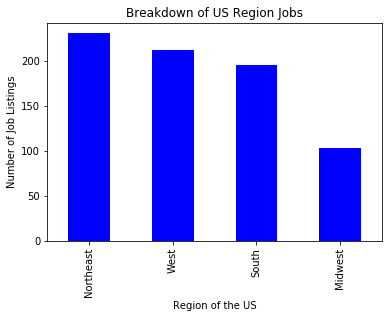

In [84]:
ax = region_freq.plot(kind='bar', color = 'b')
ax.set_ylabel('Number of Job Listings')
ax.set_xlabel('Region of the US')
ax.set_title('Breakdown of US Region Jobs')

In [85]:
df.groupby(['role', 'region'])['avg_salary'].mean()

role                       region   
data analyst               Midwest       59.722222
                           Northeast     79.481132
                           South         66.640625
                           West          75.575000
data engineer              Midwest      101.906250
                           Northeast    102.552632
                           South         99.085106
                           West         116.405405
data scientist             Midwest      112.191176
                           Northeast    113.390244
                           South        107.153846
                           West         129.826531
director                   Midwest      221.750000
                           Northeast    122.571429
machine learning engineer  Midwest      105.400000
                           Northeast    125.000000
                           South         87.000000
                           West         164.500000
manager                    Midwest       71.8

In [86]:
salary_by_region = df.groupby(['region'])['avg_salary'].mean().reset_index()
salary_by_region

,region,avg_salary
0,Midwest,96.466019
1,Northeast,101.755411
2,South,90.635204
3,West,113.658019


Text(0.5, 1.0, 'Salaries By Region of US')

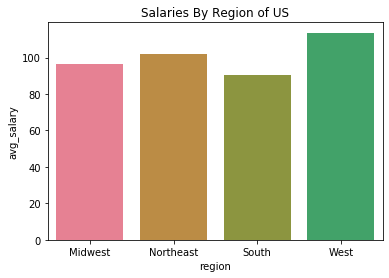

In [87]:
ax = sns.barplot(x = 'region', y= 'avg_salary', data = salary_by_region)
ax.set_title('Salaries By Region of US')

In [88]:
df.head()

,role,seniority,avg_salary,state,company_rating,company_size,sector,company_age,city,region
0,data scientist,2,72.0,NM,3.8,3,Aerospace & Defense,47,other,West
1,data scientist,2,87.5,MD,3.4,2,Health Care,36,other,South
2,data scientist,2,85.0,FL,4.8,3,Business Services,10,other,South
3,data scientist,2,76.5,WA,3.8,2,"Oil, Gas, Energy & Utilities",55,Richland,West
4,data scientist,2,114.5,NY,2.9,1,Business Services,22,New York,Northeast


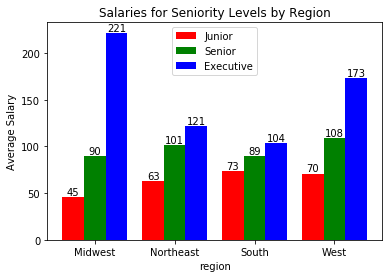

In [89]:
# salary broken down by seniority in each region
salary_region_jr = df[df['seniority']==1].groupby(['region'])['avg_salary'].mean().reset_index()
salary_region_sr = df[df['seniority']==2].groupby(['region'])['avg_salary'].mean().reset_index()
salary_region_exec = df[df['seniority']==3].groupby(['region'])['avg_salary'].mean().reset_index()

fig = plt.figure()
ax = fig.add_subplot(111)
width = 0.27
ind = np.arange(4)

rects1 = ax.bar(ind, salary_region_jr.avg_salary, width, color='r')

rects2 = ax.bar(ind+width, salary_region_sr.avg_salary, width, color='g')

rects3 = ax.bar(ind+width*2, salary_region_exec.avg_salary, width, color='b')

ax.set_ylabel('Average Salary')
ax.set_xlabel('region')
ax.set_title('Salaries for Seniority Levels by Region')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Midwest', 'Northeast', 'South', 'West') )
ax.legend( (rects1[1], rects2[1], rects3[1]), ('Junior', 'Senior', 'Executive'), loc = 'upper center' )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.0*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


In [90]:
df[df['seniority']==1].groupby(['region'])['avg_salary'].mean().reset_index()

,region,avg_salary
0,Midwest,45.500000
1,Northeast,63.272727
2,South,73.800000
3,West,70.916667


Text(0.5, 1.0, 'Company Size By Region of US')

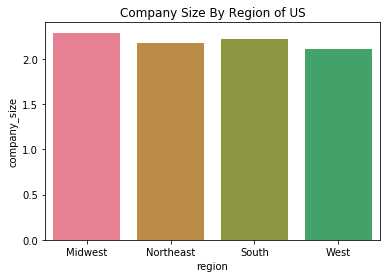

In [91]:
# average company size in each region
size_by_region = df.groupby(['region'])['company_size'].mean().reset_index()
ax = sns.barplot(x = 'region', y= 'company_size', data = size_by_region)
ax.set_title('Company Size By Region of US')

Text(0.5, 1.0, 'Seniority By Region of US')

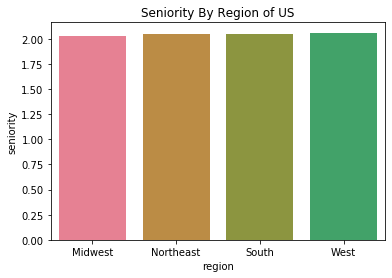

In [92]:
# number of each type of seniority in each region (where are the entry level roles?)
seniority_by_region = df.groupby(['region'])['seniority'].mean().reset_index()

ax = sns.barplot(x = 'region', y= 'seniority', data = seniority_by_region)
ax.set_title('Seniority By Region of US')

This visual doesn't tell us much since so much of the data is in the seniority 2 category, keeping the averages close to 2.

In [93]:
df.seniority.value_counts()

2    654
3     63
1     25
Name: seniority, dtype: int64

Text(0.5, 1.0, 'Seniority By Region of US (Excluding Category 2)')

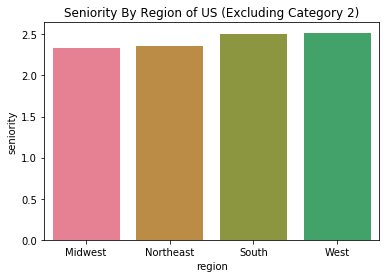

In [94]:
seniority_by_region_no_2 = df[df['seniority']!=2].groupby(['region'])['seniority'].mean().reset_index()
ax = sns.barplot(x = 'region', y= 'seniority', data = seniority_by_region_no_2)
ax.set_title('Seniority By Region of US (Excluding Category 2)')

In [95]:
# adjust for cost of living in most common cities and compute best take home salary location for data scientists

# look at avg salary in the 10 of the biggest cities for Data Scientist in the US
salary_by_top_city = df[df['city'].isin(['Austin', 'Boston', 'Chicago', 'Denver', 'New York', 'San Francisco', 'Seattle', 'Bay Area', 'Charlotte', 'DC'])].groupby(['city'])['avg_salary'].mean().reset_index()
salary_by_top_city = salary_by_top_city.set_index('city')['avg_salary'].to_dict()
salary_by_top_city

{'Austin': 120.4375,
 'Bay Area': 149.58928571428572,
 'Boston': 109.08450704225352,
 'Charlotte': 108.25,
 'Chicago': 126.765625,
 'DC': 110.18181818181819,
 'Denver': 97.9,
 'New York': 103.13636363636364,
 'San Francisco': 134.42105263157896,
 'Seattle': 90.7}

In [96]:
# adjust the salary in each location by the cost of living index
# cost of living index used at https://www.expatistan.com/cost-of-living/index/north-america
# Bay area was the average of San Jose and Mountainview

COL_index = {'Austin': 178, 'Bay Area': 241, 'Boston': 221, 'Charlotte': 175, 'Chicago': 206,
             'DC': 232, 'Denver': 204, 'New York': 270, 'San Francisco': 257, 'Seattle': 213}
for key in COL_index.keys():
    salary_by_top_city[key] = salary_by_top_city[key]/(COL_index[key]/100)
    
salary_by_top_city

{'Austin': 67.66151685393258,
 'Bay Area': 62.07024303497332,
 'Boston': 49.35950544898349,
 'Charlotte': 61.857142857142854,
 'Chicago': 61.536711165048544,
 'DC': 47.49216300940439,
 'Denver': 47.990196078431374,
 'New York': 38.1986531986532,
 'San Francisco': 52.30391152979726,
 'Seattle': 42.58215962441315}

In [97]:
salary_by_top_city = pd.DataFrame(salary_by_top_city.items(), columns=['City', 'Salary'])

salary_by_top_city.sort_values(by = ['Salary'], inplace = True, ascending = False)


Text(0.5, 1.0, 'Cost of Living Adjusted Average Salary in Top US Cities')

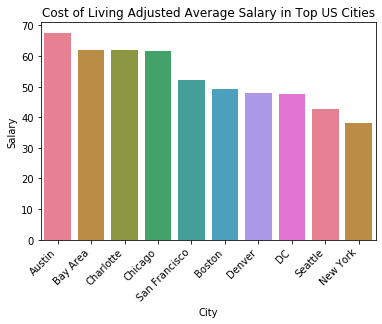

In [98]:
ax = sns.barplot(x = 'City', y = 'Salary', data = salary_by_top_city, palette = sns.color_palette("husl", 8))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Cost of Living Adjusted Average Salary in Top US Cities')